In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sns

In [2]:
df=pd.read_csv('gld_price_data.csv')

In [3]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
df.shape

(2290, 6)

In [9]:
df=df.drop(['Date'],axis=1)
correlation=df.corr()
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

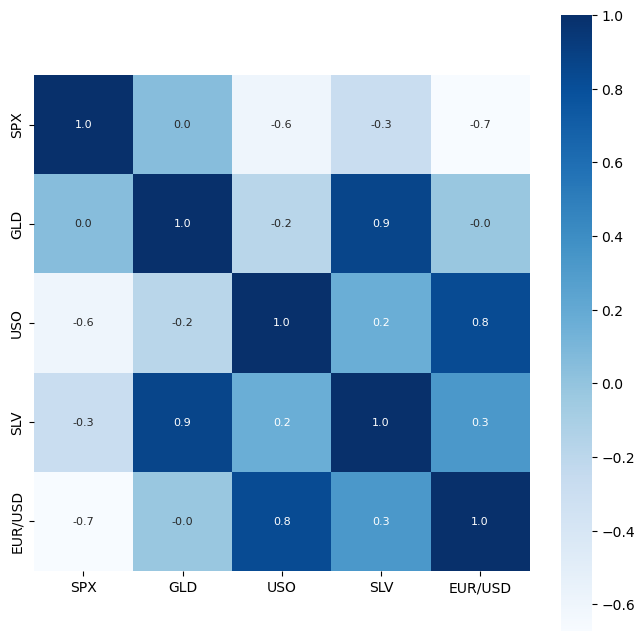

In [10]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

C:\Users\saurabh\AppData\Local\Temp\ipykernel_3184\3736964373.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

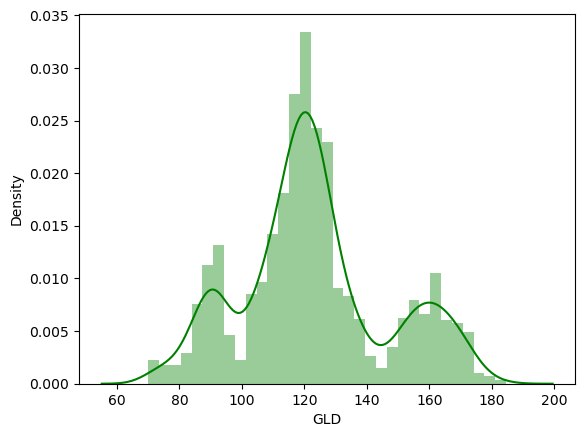

In [11]:
sns.distplot(df['GLD'],color='green')

In [13]:
X = df.drop(['GLD'],axis=1)
Y = df['GLD']

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [16]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100)

In [17]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [18]:
test_data_prediction = regressor.predict(X_test)

In [19]:
test_data_prediction

array([168.49949954,  81.9410998 , 116.09430037, 127.7209009 ,
       120.61020132, 154.81639831, 150.12129789, 126.15520041,
       117.36169877, 126.11990047, 116.81180072, 171.36320066,
       141.86379839, 167.7671983 , 115.19249978, 117.62230034,
       138.49750335, 170.11980036, 159.34880292, 160.14459906,
       155.19800025, 125.30690014, 175.66159888, 157.16480272,
       125.2959002 ,  93.73089953,  77.65260009, 120.65980003,
       119.17840002, 167.39640012,  88.26060046, 125.3341002 ,
        91.26450091, 117.77670026, 121.1340988 , 135.99980138,
       115.34710145, 115.15690055, 146.9724994 , 107.41340067,
       103.98160221,  87.23409797, 126.42930028, 117.9903001 ,
       154.13809926, 119.64240011, 108.38809973, 108.02599836,
        93.21950067, 127.22629754,  75.00480032, 113.66549934,
       121.43919999, 111.25389899, 118.82559882, 120.58309919,
       159.62520042, 167.53190062, 146.98009671,  85.78509861,
        94.27010047,  86.820699  ,  90.36770011, 118.99

In [20]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9893263264847767


In [21]:
Y_test = list(Y_test)

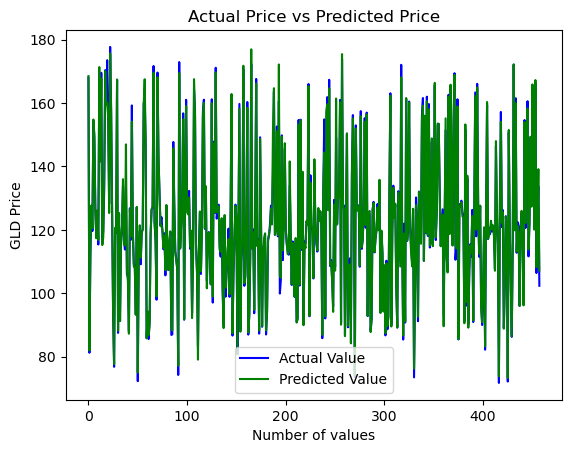

In [22]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()